TASK 1:

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
  
# Read the CSV file.
data = pd.read_csv('CTG.csv', skiprows=1)

# Select the relevant numerical columns.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

X.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
658,130.0,1.0,0.0,3.0,0.0,0.0,0.0,24.0,1.2,12.0,...,35.0,120.0,155.0,1.0,0.0,134.0,133.0,135.0,1.0,0.0
1734,134.0,9.0,1.0,8.0,5.0,0.0,0.0,59.0,1.2,0.0,...,109.0,80.0,189.0,6.0,0.0,150.0,146.0,150.0,33.0,0.0
1226,125.0,1.0,0.0,4.0,0.0,0.0,0.0,43.0,0.7,31.0,...,21.0,120.0,141.0,0.0,0.0,131.0,130.0,132.0,1.0,0.0
1808,143.0,0.0,0.0,1.0,0.0,0.0,0.0,69.0,0.3,6.0,...,27.0,132.0,159.0,1.0,0.0,145.0,144.0,146.0,1.0,0.0
825,152.0,0.0,0.0,4.0,0.0,0.0,0.0,62.0,0.4,59.0,...,25.0,136.0,161.0,0.0,0.0,159.0,156.0,158.0,1.0,1.0


In [48]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy='most_frequent')

from sklearn.model_selection import cross_val_score

import numpy as np
np.mean(cross_val_score(clf, Xtrain, Ytrain))

np.float64(0.7805882352941176)

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

clf1 = DecisionTreeClassifier(random_state=0, max_depth=7)
clf2 = RandomForestClassifier(random_state=0)
clf3 = GradientBoostingClassifier(random_state=0)
clf4 = Perceptron(random_state=0)
clf5 = LogisticRegression(random_state=0)
clf6 = LinearSVC(random_state=0)
clf7 = MLPClassifier(random_state=0)

classifiers = [clf1, clf2, clf3, clf4, clf5, clf6, clf7]
classifier_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Perceptron',
                    'Logistic Regression', 'Linear SVC', 'MLP Classifier']

for clf, name in zip(classifiers, classifier_names):
    crossArray = cross_val_score(clf, Xtrain, Ytrain)
    score = np.mean(crossArray)
    print(f'{name} average cross-validation score: {score}')

Decision Tree average cross-validation score: 0.9317647058823528
Random Forest average cross-validation score: 0.9429411764705883
Gradient Boosting average cross-validation score: 0.95
Perceptron average cross-validation score: 0.825294117647059
Logistic Regression average cross-validation score: 0.8735294117647058


c:\Users\smelk\ChalmersCode\AML (DAT341)\Applied-Machine-Learning-DAT341-\sklearn-env\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\smelk\ChalmersCode\AML (DAT341)\Applied-Machine-Learning-DAT341-\sklearn-env\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You mi

Linear SVC average cross-validation score: 0.8958823529411765
MLP Classifier average cross-validation score: 0.8847058823529412


In [50]:
from sklearn.metrics import accuracy_score

clf3.fit(Xtrain, Ytrain)
Yguess = clf3.predict(Xtest)

print(f"Final Test Accuracy: {accuracy_score(Ytest, Yguess)}")

Final Test Accuracy: 0.9295774647887324


We tried all all models mentioned and compared them and the top three from worst to best were Decision Tree, Random Forest and Gradient Boosting with accuracy scores of 0.9317647058823528, 0.9429411764705883 and 0.95 respectively.

TASK 2:

In [51]:
class DecisionTreeLeaf:

    def __init__(self, value):
        self.value = value

    # This method computes the prediction for this leaf node. This will just return a constant value.
    def predict(self, x):
        return self.value

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_id = str(node_counter)
        val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
        graph.node(node_id, val_str, style='filled')
        return node_counter+1, node_id
        
    def __eq__(self, other):
        if isinstance(other, DecisionTreeLeaf):
            return self.value == other.value
        else:
            return False

In [52]:
class DecisionTreeBranch:

    def __init__(self, feature, threshold, low_subtree, high_subtree):
        self.feature = feature
        self.threshold = threshold
        self.low_subtree = low_subtree
        self.high_subtree = high_subtree

    # For a branch node, we compute the prediction by first considering the feature, and then 
    # calling the upper or lower subtree, depending on whether the feature is or isn't greater
    # than the threshold.
    def predict(self, x):
        if x[self.feature] <= self.threshold:
            return self.low_subtree.predict(x)
        else:
            return self.high_subtree.predict(x)

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_counter, low_id = self.low_subtree.draw_tree(graph, node_counter, names)
        node_counter, high_id = self.high_subtree.draw_tree(graph, node_counter, names)
        node_id = str(node_counter)
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lbl = f'{fname} > {self.threshold:.4g}?'
        graph.node(node_id, lbl, shape='box', fillcolor='yellow', style='filled, rounded')
        graph.edge(node_id, low_id, 'False')
        graph.edge(node_id, high_id, 'True')
        return node_counter+1, node_id
        

In [53]:
from graphviz import Digraph
from sklearn.base import BaseEstimator, ClassifierMixin
from abc import ABC, abstractmethod
import numpy as np
import pandas as pd

class DecisionTree(ABC, BaseEstimator):

    def __init__(self, max_depth):
        super().__init__()
        self.max_depth = max_depth
        
    # As usual in scikit-learn, the training method is called *fit*. We first process the dataset so that
    # we're sure that it's represented as a NumPy matrix. Then we call the recursive tree-building method
    # called make_tree (see below).
    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            self.names = X.columns
            X = X.to_numpy()
        elif isinstance(X, list):
            self.names = None
            X = np.array(X)
        else:
            self.names = None
        Y = np.array(Y)        
        self.root = self.make_tree(X, Y, self.max_depth)
        
    def draw_tree(self):
        graph = Digraph()
        self.root.draw_tree(graph, 0, self.names)
        return graph
    
    # By scikit-learn convention, the method *predict* computes the classification or regression output
    # for a set of instances.
    # To implement it, we call a separate method that carries out the prediction for one instance.
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self.predict_one(x) for x in X]

    # Predicting the output for one instance.
    def predict_one(self, x):
        return self.root.predict(x)        

    # This is the recursive training 
    def make_tree(self, X, Y, max_depth):

        # We start by computing the default value that will be used if we'll return a leaf node.
        # For classifiers, this will be the most common value in Y.
        default_value = self.get_default_value(Y)

        # First the two base cases in the recursion: is the training set completely
        # homogeneous, or have we reached the maximum depth? Then we need to return a leaf.

        # If we have reached the maximum depth, return a leaf with the majority value.
        if max_depth == 0:
            return DecisionTreeLeaf(default_value)

        # If all the instances in the remaining training set have the same output value,
        # return a leaf with this value.
        if self.is_homogeneous(Y):
            return DecisionTreeLeaf(default_value)

        # Select the "most useful" feature and split threshold. To rank the "usefulness" of features,
        # we use one of the classification or regression criteria.
        # For each feature, we call best_split (defined in a subclass). We then maximize over the features.
        n_features = X.shape[1]
        _, best_feature, best_threshold = max(self.best_split(X, Y, feature) for feature in range(n_features))
        
        if best_feature is None:
            return DecisionTreeLeaf(default_value)

        # Split the training set into subgroups, based on whether the selected feature is greater than
        # Split the training set into subgroups, based on whether the selected feature is greater than
        # the threshold or not
        X_low, X_high, Y_low, Y_high = self.split_by_feature(X, Y, best_feature, best_threshold)

        # Build the subtrees using a recursive call. Each subtree is associated
        # with a value of the feature.
        low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
        high_subtree = self.make_tree(X_high, Y_high, max_depth-1)

        if low_subtree == high_subtree:
            return low_subtree

        # Return a decision tree branch containing the result.
        return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)
    
    # Utility method that splits the data into the "upper" and "lower" part, based on a feature
    # and a threshold.
    def split_by_feature(self, X, Y, feature, threshold):
        low = X[:,feature] <= threshold
        high = ~low
        return X[low], X[high], Y[low], Y[high]
    
    # The following three methods need to be implemented by the classification and regression subclasses.
    
    @abstractmethod
    def get_default_value(self, Y):
        pass

    @abstractmethod
    def is_homogeneous(self, Y):
        pass

    @abstractmethod
    def best_split(self, X, Y, feature):
        pass

In [54]:
from collections import Counter

class TreeClassifier(DecisionTree, ClassifierMixin):

    def __init__(self, max_depth=10, criterion='maj_sum'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'maj_sum':
            self.criterion_function = majority_sum_scorer
        elif self.criterion == 'info_gain':
            self.criterion_function = info_gain_scorer
        elif self.criterion == 'gini':
            self.criterion_function = gini_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        self.class_distribution = Counter(Y)
        return self.class_distribution.most_common(1)[0][0]
    
    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        return len(self.class_distribution) == 1
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = Counter()
        high_distr = Counter(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            
            # Update the frequency tables.
            low_distr[y_i] += 1
            high_distr[y_i] -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point


In [55]:
def majority_sum_scorer(n_low, low_distr, n_high, high_distr):
    maj_sum_low = low_distr.most_common(1)[0][1]
    maj_sum_high = high_distr.most_common(1)[0][1]
    return maj_sum_low + maj_sum_high
    
def entropy(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return -sum(p*np.log2(p) if p > 0 else 0 for p in ps)

def info_gain_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*entropy(low_distr)+n_high*entropy(high_distr))/(n_low+n_high)

def gini_impurity(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return 1-sum(p**2 for p in ps)
    
def gini_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*gini_impurity(low_distr)+n_high*gini_impurity(high_distr))/(n_low+n_high)

In [56]:
custom_depths = range(1, 15)
custom_scores = []

print("Tuning Custom TreeClassifier...")

for d in custom_depths:
    clf_custom = TreeClassifier(max_depth=d)
    
    # Run cross-validation
    scores = cross_val_score(clf_custom, Xtrain, Ytrain)
    custom_scores.append(np.mean(scores))
    print(f"Depth {d}: {np.mean(scores):.4f}")

# Find the winner
best_custom_score = max(custom_scores)
best_custom_depth = custom_depths[custom_scores.index(best_custom_score)]

print(f"\nWINNER: Best Depth for Custom Tree is {best_custom_depth} (Score: {best_custom_score:.4f})")


best_custom_tree = TreeClassifier(max_depth=best_custom_depth)
best_custom_tree.fit(Xtrain, Ytrain)

custom_test_acc = accuracy_score(Ytest, best_custom_tree.predict(Xtest))
print(f"Final Test Accuracy for Custom Tree: {custom_test_acc:.4f}")


Tuning Custom TreeClassifier...
Depth 1: 0.8318
Depth 2: 0.8912
Depth 3: 0.9006
Depth 4: 0.9112
Depth 5: 0.9094
Depth 6: 0.9094
Depth 7: 0.9106
Depth 8: 0.9082
Depth 9: 0.9112
Depth 10: 0.9124
Depth 11: 0.9129
Depth 12: 0.9082
Depth 13: 0.9171
Depth 14: 0.9171

WINNER: Best Depth for Custom Tree is 13 (Score: 0.9171)
Final Test Accuracy for Custom Tree: 0.8732


We copied the tree from the notebook and tried the depths between 1 - 15 with 13 giving the best result. It gave a cross valöidation score of 0.9171 and an accuracy of 0.8732.

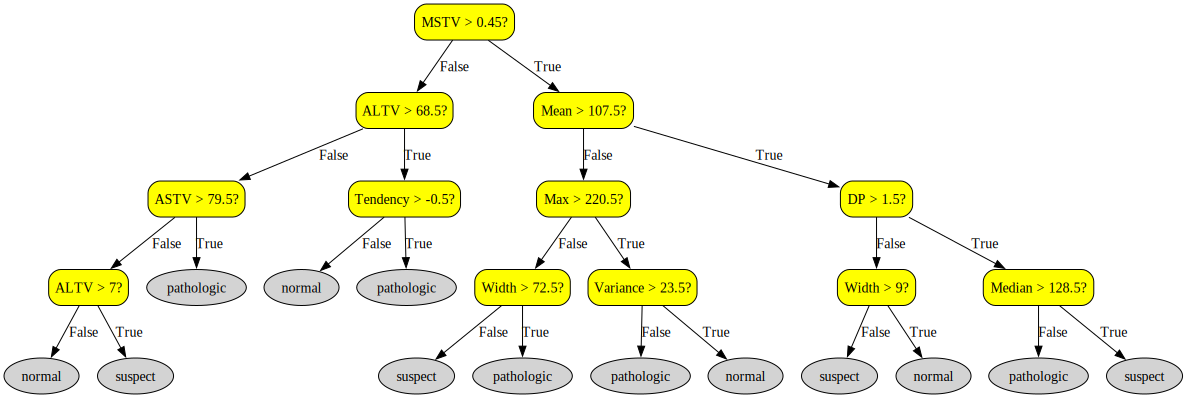

In [57]:
simple_tree = TreeClassifier(max_depth=4)
simple_tree.fit(Xtrain, Ytrain)
display(simple_tree.draw_tree())

Afterwords we also drew the tree but with a depth of 4 to make the picture resonable size.

TASK 3:

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Read the Excel file using Pandas.
alldata = pd.read_excel('Hemnet_data.xlsx')

# # Convert the timestamp string to an integer representing the year.
alldata['year'] = pd.DatetimeIndex(alldata['Sold Date']).year

# Convert 'yes' to 1 and 'no' to 0
alldata['Balcony'] = alldata['Balcony'].map({'Yes': 1, 'No': 0})
alldata['Patio'] = alldata['Patio'].map({'Yes': 1, 'No': 0})
alldata['Lift'] = alldata['Lift'].map({'Yes': 1, 'No': 0})

# Select the 12 input columns and the output column.
selected_columns = ['Final Price (kr)', 'year',  'Num of Room', 'Living Area (m²)', 'Balcony', 'Patio','Current Floor', 'Total Floor', 'Lift', 'Built Year', 'Fee (kr/month)', 'Operating Fee (kr/year)']
alldata = alldata[selected_columns]
cols_to_clean = ['Final Price (kr)', 'Fee (kr/month)', 'Operating Fee (kr/year)']

# Cleaning...
for col in cols_to_clean:
    alldata[col] = alldata[col].astype(str).str.replace('kr', '', regex=False).str.replace(' ', '')
    alldata[col] = pd.to_numeric(alldata[col], errors='coerce')
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('Final Price (kr)', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['Final Price (kr)'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [63]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
m1 = DummyRegressor()
cross_validate(m1, Xtrain, Ytrain, scoring='neg_mean_squared_error')

{'fit_time': array([0.00151134, 0.00100541, 0.00152063, 0.00151849, 0.00152087]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([-0.35548711, -0.35827597, -0.31759722, -0.34236524, -0.35596055])}

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=0),
    'Random Forest': RandomForestRegressor(random_state=0),
    'Gradient Boosting': GradientBoostingRegressor(random_state=0),
    'MLP Regressor': MLPRegressor(random_state=0)
    }


for name, model in models.items():
    cv_results = cross_validate(model, Xtrain, Ytrain, scoring='neg_mean_squared_error')
    mean_mse = -np.mean(cv_results['test_score'])
    print(f"{name}: {mean_mse}")

Linear Regression: 0.22044055517560884
Ridge Regression: 0.22043967992162883
Lasso Regression: 0.2791880396320781
Decision Tree: 0.2798502782073692
Random Forest: 0.1487875108273932
Gradient Boosting: 0.15791211729893198


c:\Users\smelk\ChalmersCode\AML (DAT341)\Applied-Machine-Learning-DAT341-\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\smelk\ChalmersCode\AML (DAT341)\Applied-Machine-Learning-DAT341-\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\smelk\ChalmersCode\AML (DAT341)\Applied-Machine-Learning-DAT341-\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Regressor: 7.514016970658103


We tried all mentioned models and the result we got was that the Random Forrest model resulted in the smalles MSE value.

In [67]:
from sklearn.metrics import mean_squared_error

best_model = models['Random Forest']
best_model.fit(Xtrain, Ytrain)
Yguess = best_model.predict(Xtest)
final_mse = mean_squared_error(Ytest, Yguess)

print(f"Final Test MSE: {final_mse:.4f}")

Final Test MSE: 0.1332


We tested the Random Forrest model against the test data and got a final MSE value of 0.1332